Import Libraries

In [1]:
import re
import os
import unicodedata
import itertools
import pandas as pd
import numpy as np 
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG
import warnings
warnings.filterwarnings("ignore")


In [2]:
path = r"C:\Users\acer\Desktop\Data Science\Prodigy Infotech\house data\train.csv"
top = r"C:\Users\acer\Desktop\Data Science\Prodigy Infotech\house data\test.csv"

In [3]:
data = pd.read_csv(path)
test = pd.read_csv(top)



In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
data.SalePrice.value_counts()

SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64

In [9]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


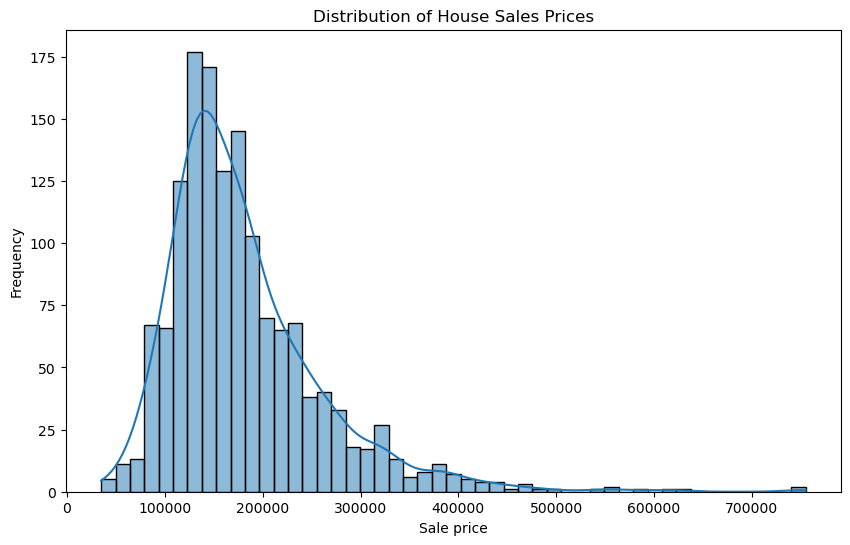

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, palette='Set2')
plt.title('Distribution of House Sales Prices')
plt.xlabel('Sale price')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [11]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
blank_data = data.isnull().sum()

print("Blank data per column:")
print(blank_data)

Blank data per column:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [13]:
null_data = data.isnull().any().any()

if null_data:
    print("There is null data in the DataFrame.")
else:
    print("There is no null data in the DataFrame.")

There is null data in the DataFrame.


In [14]:
data_nan_per_column = data.isna().sum()
data_nan_total = data.isna().sum().sum()

print("NaN data per column:")
print(data_nan_per_column)
print("\nTotal NaN data in DataFrame:", data_nan_total)

NaN data per column:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Total NaN data in DataFrame: 7829


In [15]:
columns_with_nan = data.columns[data.isnull().any()]

print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


In [16]:
data_missing = data.isnull()

print("Missing data by column:")
data_missing

Missing data by column:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [17]:
total_missing = data.isnull().sum().sum()
print("Total data missing in DataFrame:", total_missing)

Total data missing in DataFrame: 7829


In [18]:
clean_data = data.dropna()
print("DataFrame dimensions before removing null data:", data.shape)
print("DataFrame dimensions after removing null data:", clean_data.shape)

DataFrame dimensions before removing null data: (1460, 81)
DataFrame dimensions after removing null data: (0, 81)


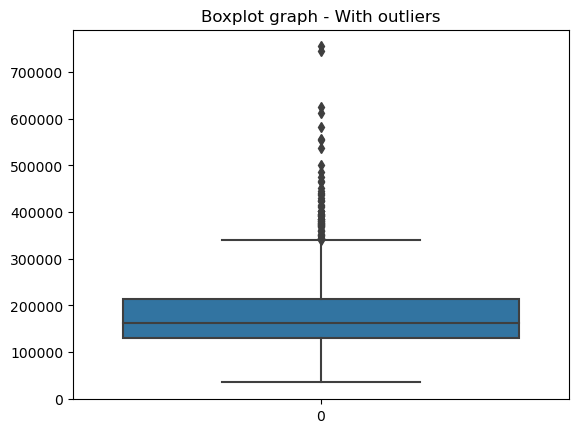

In [19]:
sns.boxplot(data["SalePrice"])
plt.title("Boxplot graph - With outliers")
plt.grid(False)
plt.show()

In [23]:
Q1 = data['SalePrice'].quantile(0.25)
Q3 = data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 0.3 * IQR
upper_bound = Q3 + 0.3 * IQR

data = data[(data['SalePrice'] >= lower_bound) & (data['SalePrice'] <= upper_bound)]

def remove_outliers(data, column, m=3):
    mean = np.mean(data[column])
    std_dev = np.std(data[column])
    lower_bound = mean - m * std_dev
    upper_bound = mean + m * std_dev
    return lower_bound, upper_bound
column = ["YearBuilt", "GarageYrBlt", "GrLivArea", "GarageArea", "OverallQual", "SalePrice"]

m = 3

for column in column:
    lower_bound, upper_bound = remove_outliers(data, column, m)
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

data.reset_index(drop=True, inplace=True)

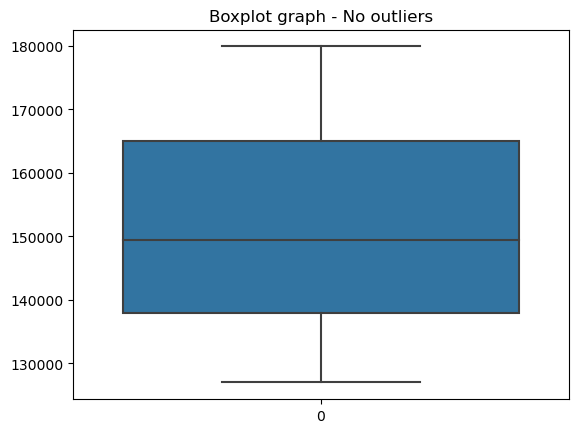

In [24]:
sns.boxplot(data["SalePrice"])
plt.title("Boxplot graph - No outliers")
plt.grid(False)
plt.show()

In [25]:
x = data[["YearBuilt", "GrLivArea", "GarageYrBlt", "GarageArea", "OverallQual", "TotRmsAbvGrd"]]
y = data["SalePrice"]

In [26]:
x.shape

(533, 6)

In [27]:
y.shape

(533,)

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

Label_pre = LabelEncoder()
data_cols=data.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)

data[label_col]=data[label_col].apply(lambda col:Label_pre.fit_transform(col))

Label_pre

LabelEncoder()

In [29]:
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,4,70,2,60.0,9550,0,2,0,3,0,...,0,1,4,3,0,2,2006,5,0,140000
1,6,50,2,85.0,14115,0,2,0,3,0,...,0,1,2,2,700,10,2009,5,3,143000
2,9,50,3,51.0,6120,0,2,3,3,0,...,0,1,4,3,0,4,2008,5,0,129900
3,11,20,2,70.0,11200,0,2,3,3,0,...,0,1,4,3,0,2,2008,5,3,129500
4,13,20,2,NaN,12968,0,2,1,3,0,...,0,1,4,3,0,9,2008,5,3,144000


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Viewing X train data:", X_train.shape)

print("Viewing y train data:", y_train.shape)

Viewing X train data: (426, 6)
Viewing y train data: (426,)


In [31]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(X_train)

X_train_imputed = imputer.transform(X_train)

X_test_imputed = imputer.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
model = {"Linear Regression": LinearRegression()}
for name, model in tqdm(model.items()):
    
    model.fit(X_train_imputed, y_train)
    
    predictions = model.predict(X_test_imputed)
    
    r2 = r2_score(y_test, predictions)
    print(f"Model: {name} - R2 Score: {r2}")

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 56.20it/s]

Model: Linear Regression - R2 Score: 0.4570328379353823
